<a href="https://colab.research.google.com/github/SamuelCdna/-predicciones-de-ventas-alimenticias-/blob/master/predicciones_de_ventas_alimenticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# predicciones-de-ventas-alimenticias

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
filename = "/content/sales_predictions.csv"

-Item_MRP

Precio máximo de venta al público (precio de catálogo) del producto


In [9]:
df = pd.read_csv(filename) 
df.head() 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1. ¿Cuántas filas y columnas?

In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


2.¿Cuáles son los tipos de datos en cada variable?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3.¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [ ]:
df.duplicated().sum()

0

4.Identifiquen los valores faltantes.

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5.Decidan cómo abordar los valores faltantes

In [ ]:
#lo que decidi hacer con los datos faltantes para evitar la perdida de datos importantes
#decidi eliminar la columna del peso de los articulos ya que no influye 
#en la estadistica de las ventas y el tamaño de las tiendas 
#para los tamaños de cada local decidi rellenar con la moda de los datos 
#no es un dato que influye demasiado en la estadistica de las ventas 
#pero es importante paa comprender los tipos de mercados y locales de pequeños a grandes y sus ventas en base a eso 
df['Outlet_Size'].fillna('Medium', inplace=True)
df.isna().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.drop(columns='Item_Weight', inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

R// no se hallan inconsistencias en los datos 

8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [ ]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [ ]:
df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [ ]:
df['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [ ]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

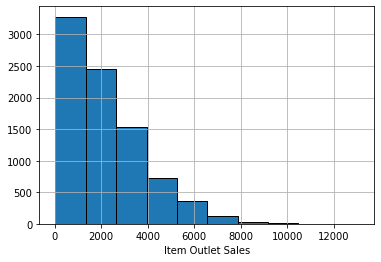

In [ ]:
df['Item_Outlet_Sales'].hist(edgecolor='black').set_xlabel('Item Outlet Sales')
plt.ticklabel_format(useOffset=False, style='plain')

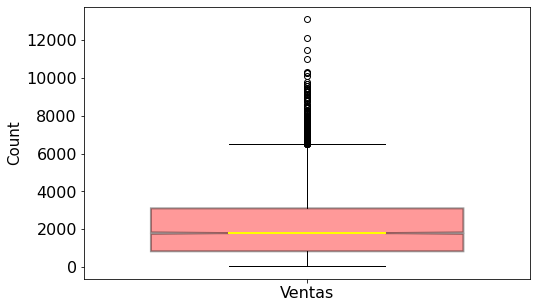

In [ ]:
Ventas = df['Item_Outlet_Sales']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([Ventas],
           notch = True,
           labels=['Ventas'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.ylabel('Count', fontsize = 15);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

In [ ]:
corr = df.corr()

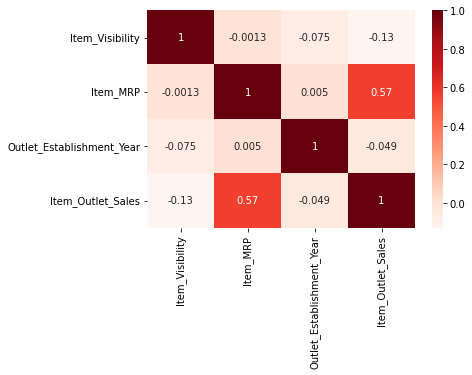

In [ ]:
sns.heatmap(corr, cmap = 'Reds', annot = True);

In [23]:
ItemIdentifier = df['Item_Type']

In [24]:
ItemSales = df['Item_Outlet_Sales']

(0.0, 3000.0)

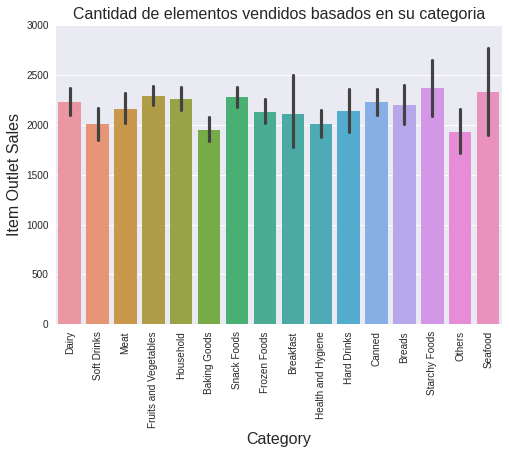

In [114]:
sns.barplot(x =ItemIdentifier , y = ItemSales);
plt.ylabel('Item Outlet Sales',fontsize = 16);
plt.xlabel('Category',fontsize = 16);
plt.title('Cantidad de elementos vendidos basados en su categoria',fontsize = 16);
plt.xticks(rotation = 90);
plt.ylim(bottom=0,top=3000)

In [91]:
itemcontentMrp = df.groupby('Item_Fat_Content')['Item_MRP'].nunique()# get number of olympians per year
itemcontentMrp

Item_Fat_Content
LF          309
Low Fat    4002
Regular    2421
low fat     112
reg         116
Name: Item_MRP, dtype: int64

In [92]:
itemcontentMrp2 = df.groupby('Item_Fat_Content')['Item_MRP'].mean()# get number of olympians per year
itemcontentMrp2

Item_Fat_Content
LF         138.788311
Low Fat    140.968921
Regular    141.714476
low fat    134.569043
reg        136.313513
Name: Item_MRP, dtype: float64

In [90]:
itemcontent = list(itemcontentMrp.index)
itemcontent

['LF', 'Low Fat', 'Regular', 'low fat', 'reg']

In [93]:
itemcontentN = list(itemcontentMrp2.values)
itemcontentN



[138.78831075949367,
 140.96892108469248,
 141.71447608168916,
 134.56904285714285,
 136.3135128205128]

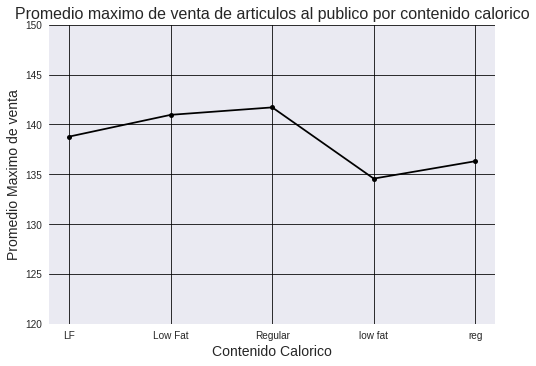

In [116]:
plt.style.use('seaborn')
plt.plot(itemcontent,itemcontentN, c= 'k',marker = '.', markersize = 10);
plt.title('Promedio maximo de venta de articulos al publico por contenido calorico', fontsize = 16);
plt.ylabel('Promedio Maximo de venta' ,fontsize = 14 );
plt.xlabel('Contenido Calorico' ,fontsize = 14 );
plt.ylim(bottom=120,top=150)
plt.grid(c = 'k', alpha = .8,linestyle = '-')